<hr/>
<h1><center> Data Modelling - Phnom Penh</center></h1>
<hr/>

***

### Data Description

1. Date
2. Time 
3. Water Content (m3/m3)
4. Solar Radiation (W/m2)
5. Rain (mm)
6. Temperature (Celcuis)
7. RH (%)
8. Wind Speed (m/s)
9. Gust Speed (m/s)
10. Wind Direction (Degree)
11. Dew Point (Celcuis)

# Import Packages
***

In [72]:
# importing the required modules
import glob
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#important libraries for statistical 

from datetime import datetime, date 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

# Read the Data
***

In [73]:
# specifying the path to csv files
# change ur directory here based on pwd

#path = "/Users/votanasrey/Documents/Term10/ProjectII/Cambodia_Weather_Forcasting_Prediction_With_Time_Series/datasets/intermediate_layer/phnom_penh"
path = "../datasets/intermediate_layer/phnom_penh"

# csv files in the path
data = pd.read_csv(path + "/cleaned_dataset_phnom_penh.csv")
data.drop("Unnamed: 0", axis=1, inplace=True)
data.head()

,date,time,water_content,solar_radiation,rain,temperature,rh,wind_speed,gust_speed,wind_direction,dew_point
0,20/11/01,00:00:00,0.3062,1,0.0,26.84,94.8,0.3,1.0,152.0,25.97
1,20/11/01,00:05:00,0.3066,1,0.0,26.77,94.7,0.0,1.0,152.0,25.88
2,20/11/01,00:10:00,0.3066,1,0.0,26.72,94.7,0.3,1.3,154.0,25.83
3,20/11/01,00:15:00,0.3066,1,0.0,26.65,94.6,0.0,0.0,152.0,25.74
4,20/11/01,00:20:00,0.3066,1,0.0,26.55,94.7,0.0,0.0,152.0,25.66


# Data Quality Checking
***

In [74]:
#check the data missing 
data.isnull().any()

date               False
time               False
water_content      False
solar_radiation    False
rain               False
temperature        False
rh                 False
wind_speed         False
gust_speed         False
wind_direction     False
dew_point          False
dtype: bool

In [75]:
#sum it if it has any
data.isnull().sum()

date               0
time               0
water_content      0
solar_radiation    0
rain               0
temperature        0
rh                 0
wind_speed         0
gust_speed         0
wind_direction     0
dew_point          0
dtype: int64

In [76]:
#list all the columns which has in dataset 
for i,j in enumerate(data.columns):
    print(i, " ", j)

0   date
1   time
2   water_content
3   solar_radiation
4   rain
5   temperature
6   rh
7   wind_speed
8   gust_speed
9   wind_direction
10   dew_point


In [77]:
#check the number of columns and rows in dataframe
print("Number of rows in dataframe: ", data.shape[0])
print("**"*50)
print("Number of columns in dataframe: ", data.shape[1])

Number of rows in dataframe:  135665
****************************************************************************************************
Number of columns in dataframe:  11


In [78]:
#checking all datatype in the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135665 entries, 0 to 135664
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             135665 non-null  object 
 1   time             135665 non-null  object 
 2   water_content    135665 non-null  float64
 3   solar_radiation  135665 non-null  int64  
 4   rain             135665 non-null  float64
 5   temperature      135665 non-null  float64
 6   rh               135665 non-null  float64
 7   wind_speed       135665 non-null  float64
 8   gust_speed       135665 non-null  float64
 9   wind_direction   135665 non-null  float64
 10  dew_point        135665 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 11.4+ MB


,water_content,solar_radiation,rain,temperature,rh,wind_speed,gust_speed,wind_direction,dew_point
water_content,1.000000,-0.357248,-0.000140,-0.044862,0.012880,0.001221,-0.000084,0.002339,0.033982
solar_radiation,-0.357248,1.000000,-0.001967,0.059801,-0.412642,0.292869,0.036204,-0.015362,0.002849
rain,-0.000140,-0.001967,1.000000,-0.078233,-0.012045,0.000193,0.000183,0.001834,-0.111071
temperature,-0.044862,0.059801,-0.078233,1.000000,-0.274052,-0.017085,-0.744016,-0.328151,-0.347275
rh,0.012880,-0.412642,-0.012045,-0.274052,1.000000,-0.280746,0.201184,0.145457,0.246881
wind_speed,0.001221,0.292869,0.000193,-0.017085,-0.280746,1.000000,0.043856,0.099203,-0.029001
gust_speed,-0.000084,0.036204,0.000183,-0.744016,0.201184,0.043856,1.000000,0.281206,0.550006
wind_direction,0.002339,-0.015362,0.001834,-0.328151,0.145457,0.099203,0.281206,1.000000,0.143418
dew_point,0.033982,0.002849,-0.111071,-0.347275,0.246881,-0.029001,0.550006,0.143418,1.000000


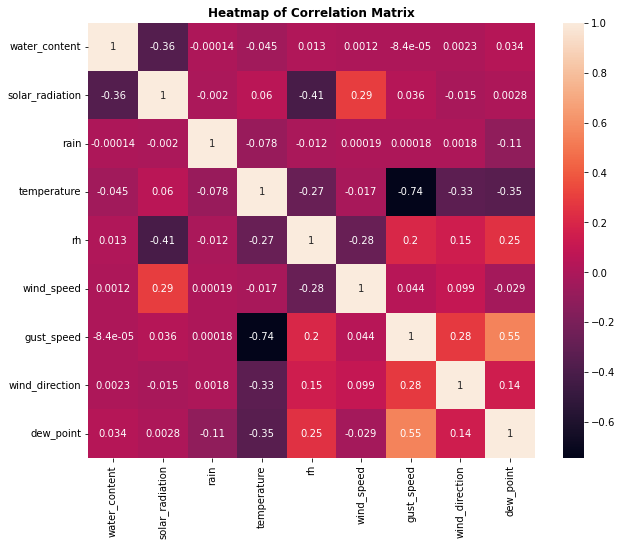

In [79]:
# Create a correlation matrix. What features correlate the most with turnover? What other correlations did you find?

plt.figure(figsize=(10,8))

correlation = data.corr()
correlation = (correlation)
sns.heatmap(correlation, 
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values, annot=True)

plt.title('Heatmap of Correlation Matrix', fontweight='bold')
correlation

# Data Wrangling | Cleansing
***

In [80]:
#select only number features
numeric_features = data.select_dtypes(include=np.number).columns.tolist()
numeric_features

['water_content',
 'solar_radiation',
 'rain',
 'temperature',
 'rh',
 'wind_speed',
 'gust_speed',
 'wind_direction',
 'dew_point']

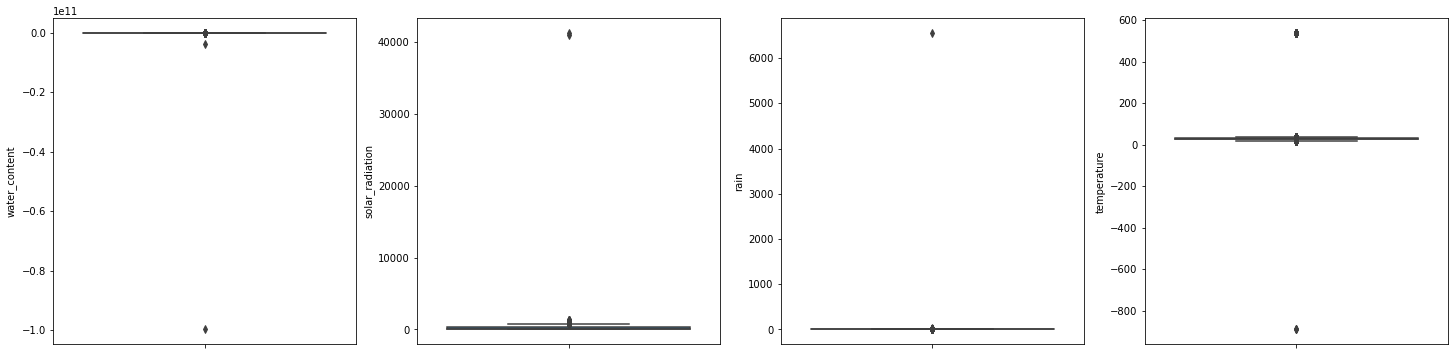

In [81]:
#check outlier of dataframe
f, axes = plt.subplots(ncols=4, figsize=(25, 6))

sns.boxplot(y=data['water_content'], ax=axes[0])
sns.boxplot(y=data['solar_radiation'], ax=axes[1])
sns.boxplot(y=data['rain'], ax=axes[2])
sns.boxplot(y=data['temperature'], ax=axes[3])

print()
plt.show()

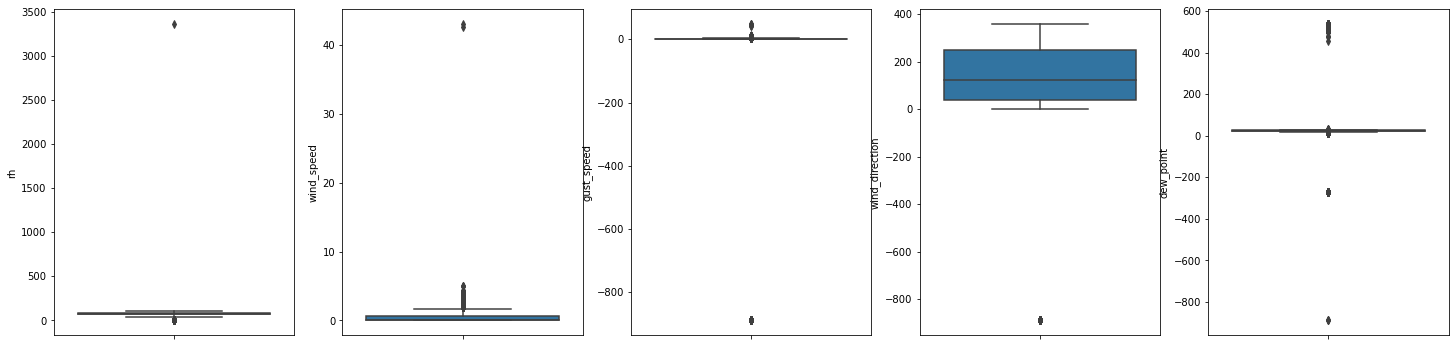

In [82]:
#check outlier of dataframe
f, axes = plt.subplots(ncols=5, figsize=(25, 6))

sns.boxplot(y=data['rh'], ax=axes[0])
sns.boxplot(y=data['wind_speed'], ax=axes[1])
sns.boxplot(y=data['gust_speed'], ax=axes[2])
sns.boxplot(y=data['wind_direction'], ax=axes[3])
sns.boxplot(y=data['dew_point'], ax=axes[4])

print()
plt.show()

In [83]:
#remove outlier from dataset
from scipy.stats import zscore

#create two columns more of zscore value
data['water_content_zscore'] = zscore(data.water_content)
data['solar_radiation_zscore'] = zscore(data.solar_radiation)
data['rain_zscore'] = zscore(data.rain)
data['temperature_zscore'] = zscore(data.temperature)
data['rh_zscore'] = zscore(data.rh)
data['wind_speed_zscore'] = zscore(data.wind_speed)
data['gust_speed_zscore'] = zscore(data.gust_speed)
data['wind_direction_zscore'] = zscore(data.wind_direction)
data['dew_point_zscore'] = zscore(data.dew_point)

#define zscore.
#Z score is in (-3,3) value, if it's out means that it has outlier
data[(data.water_content_zscore > 3.0) | (data.water_content_zscore < -3.0)]
data[(data.solar_radiation_zscore > 3.0) | (data.solar_radiation_zscore < -3.0)]
data[(data.rain_zscore > 3.0) | (data.rain_zscore < -3.0)]
data[(data.temperature_zscore > 3.0) | (data.temperature_zscore < -3.0)]
data[(data.rh_zscore > 3.0) | (data.rh_zscore < -3.0)]
data[(data.wind_speed_zscore > 3.0) | (data.wind_speed_zscore < -3.0)]
data[(data.gust_speed_zscore > 3.0) | (data.gust_speed_zscore < -3.0)]
data[(data.wind_direction_zscore > 3.0) | (data.wind_direction_zscore < -3.0)]
data[(data.dew_point_zscore > 3.0) | (data.dew_point_zscore < -3.0)]

#drop z_score
data = data.drop(data[(data.water_content_zscore > 3.0) | (data.water_content_zscore < -3.0)].index)
data = data.drop(data[(data.solar_radiation_zscore > 3.0) | (data.solar_radiation_zscore < -3.0)].index)
data = data.drop(data[(data.rain_zscore > 3.0) | (data.rain_zscore < -3.0)].index)
data = data.drop(data[(data.temperature_zscore > 3.0) | (data.temperature_zscore < -3.0)].index)
data = data.drop(data[(data.rh_zscore > 3.0) | (data.rh_zscore < -3.0)].index)
data = data.drop(data[(data.wind_speed_zscore > 3.0) | (data.wind_speed_zscore < -3.0)].index)
data = data.drop(data[(data.gust_speed_zscore > 3.0) | (data.gust_speed_zscore < -3.0)].index)
data = data.drop(data[(data.wind_direction_zscore > 3.0) | (data.wind_direction_zscore < -3.0)].index)
data = data.drop(data[(data.dew_point_zscore > 3.0) | (data.dew_point_zscore < -3.0)].index)


<h3><center>After Removed Outlier</center></h3>

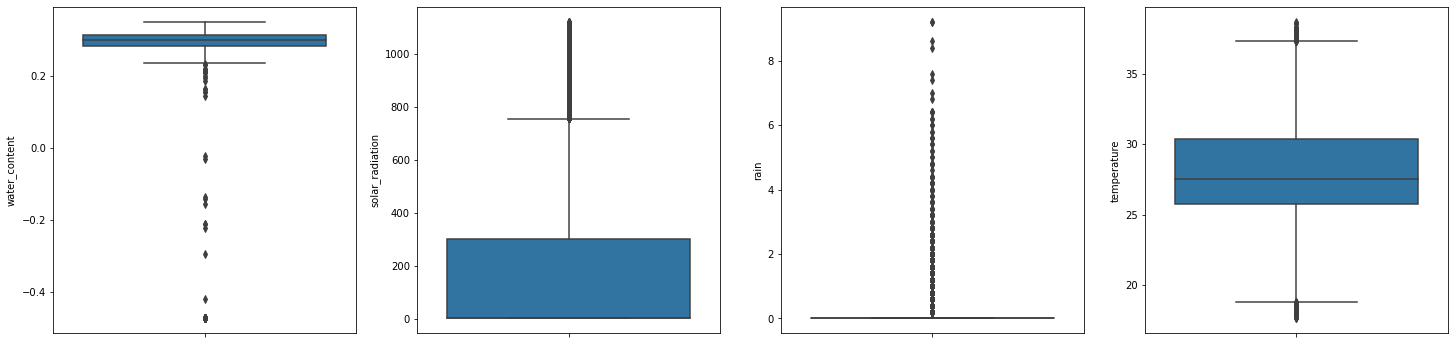

In [84]:
#check outlier of dataframe
f, axes = plt.subplots(ncols=4, figsize=(25, 6))

sns.boxplot(y=data['water_content'], ax=axes[0])
sns.boxplot(y=data['solar_radiation'], ax=axes[1])
sns.boxplot(y=data['rain'], ax=axes[2])
sns.boxplot(y=data['temperature'], ax=axes[3])

print()
plt.show()

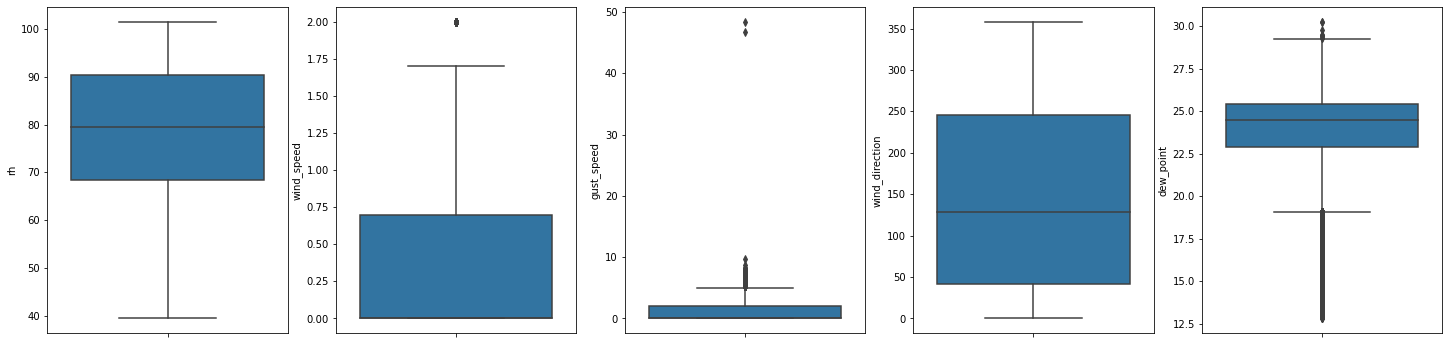

In [85]:
#check outlier of dataframe
f, axes = plt.subplots(ncols=5, figsize=(25, 6))

sns.boxplot(y=data['rh'], ax=axes[0])
sns.boxplot(y=data['wind_speed'], ax=axes[1])
sns.boxplot(y=data['gust_speed'], ax=axes[2])
sns.boxplot(y=data['wind_direction'], ax=axes[3])
sns.boxplot(y=data['dew_point'], ax=axes[4])

print()
plt.show()

In [86]:
#I can see some of features are appear with negative values soo, we can apply this method to remove them out 
#for cols in numeric_features:
#    data = data[data[cols] > 0]

#select data frame only positive values 
data = data[data['water_content'] > 0]
data.shape

(125593, 20)

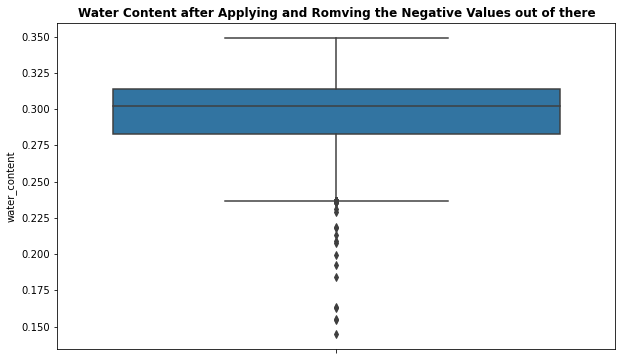

In [87]:
#Water Content after Applying and Romving the Negative Values out of there

sns.boxplot(y=data['water_content'])
plt.title("Water Content after Applying and Romving the Negative Values out of there", fontweight='bold')
plt.show()

In [88]:
#after removing z-score out, we should remove the feature name with z-score values too.

data.drop(['water_content_zscore',
          'water_content_zscore',
          'rain_zscore',
          'temperature_zscore',
          'rh_zscore',
          'wind_speed_zscore',
          'gust_speed_zscore',
          'wind_direction_zscore',
          'dew_point_zscore'], 
axis=1, inplace=True)
for i in data.columns:
    print(i)

date
time
water_content
solar_radiation
rain
temperature
rh
wind_speed
gust_speed
wind_direction
dew_point
solar_radiation_zscore


# Exploratory Data Analysis
***

In [89]:
#let's try with temperature values only first 
#select only date and temperature 

tem = data[['date', 'temperature']]
tem.tail()

,date,temperature
135660,21/09/29,27.38
135661,21/09/29,27.41
135662,21/09/29,27.41
135663,21/09/29,27.38
135664,21/09/30,27.31


In [90]:
#Parse strings to datetime type
tem['date'] = pd.to_datetime(tem['date'], yearfirst=True)
#set index from date 
#tem = tem.set_index(['date'])
#I'm going to consider the temperature just from 1900 until the end of 2012
#tem = tem.loc['2020-01-01':'2022-01-01']
#tem.head()

In [91]:
#let's sum and mean on daily temperature 
#tem = tem.append(tem.agg(['mean']).rename({'mean':'avg_daily_temperature'}))
  
tem = tem.groupby(['date'])['temperature'].mean()
tem = pd.DataFrame(tem)
tem.head()

,temperature
date,
2020-09-01,27.922465
2020-09-02,27.288849
2020-09-03,28.490451
2020-09-04,29.702847
2020-09-05,30.362083


In [92]:
#create a function for line plot 
def line_plot(x, y, title):
    plt.figure(figsize=(25,6))
    sns.lineplot(x=x, y=y)
    plt.title(title, fontweight='bold', fontsize=15)
    plt.show()

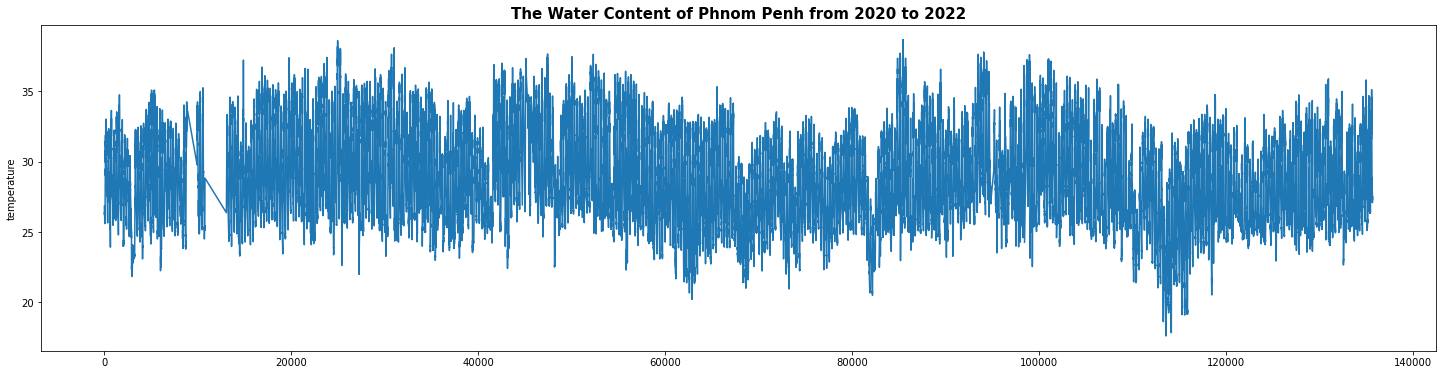

In [93]:
#draw a testing line plot
line_plot(data.date.index, data.temperature, "The Water Content of Phnom Penh from 2020 to 2022")

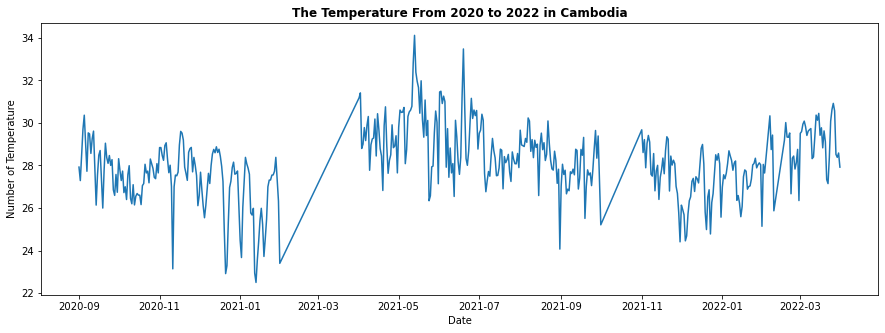

In [94]:
## plot line graph
plt.figure(figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Number of Temperature')
plt.title('The Temperature From 2020 to 2022 in Cambodia', fontweight='bold')
plt.plot(tem)
plt.show()

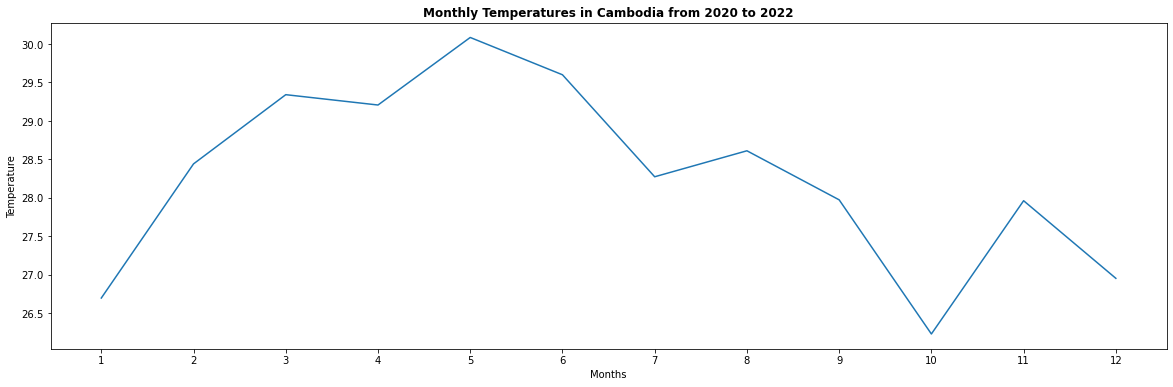

In [95]:
# we are going to create a pivot table to plot the monthly temperatures through the years

tem['month'] = tem.index.month
tem['year'] = tem.index.year
pivot = pd.pivot_table(tem, values='temperature', index='month', columns='year', aggfunc='mean')

monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.title('Monthly Temperatures in Cambodia from 2020 to 2022', fontweight='bold')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1,13)])
plt.show()

In [96]:
#drop the month and year out 
tem.drop(['month', 'year'], axis=1, inplace=True)

In [97]:
#Determine rolling statistics
rolmean = tem.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = tem.rolling(window=12).std()
print(rolmean,rolstd)

            temperature
date                   
2020-09-01          NaN
2020-09-02          NaN
2020-09-03          NaN
2020-09-04          NaN
2020-09-05          NaN
...                 ...
2022-03-27    29.315870
2022-03-28    29.241408
2022-03-29    29.125688
2022-03-30    29.105387
2022-03-31    28.963454

[478 rows x 1 columns]             temperature
date                   
2020-09-01          NaN
2020-09-02          NaN
2020-09-03          NaN
2020-09-04          NaN
2020-09-05          NaN
...                 ...
2022-03-27     1.225746
2022-03-28     1.246043
2022-03-29     1.256966
2022-03-30     1.264164
2022-03-31     1.295955

[478 rows x 1 columns]


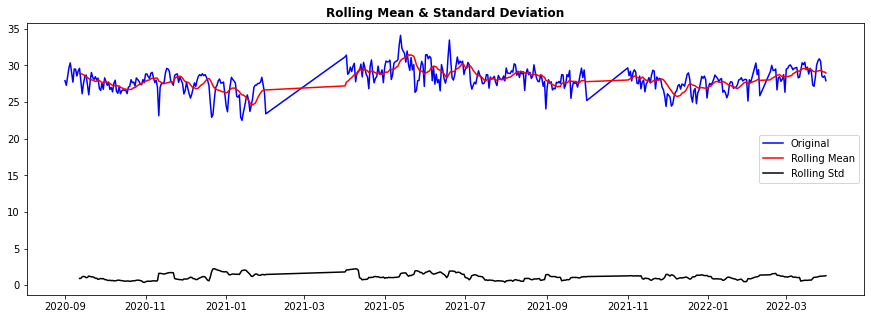

In [98]:
#Plot rolling statistics
plt.figure(figsize=(15,5))

orig = plt.plot(tem, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')

plt.title('Rolling Mean & Standard Deviation', fontweight='bold')
plt.show(block=False)

From the above graph, we see that rolling mean itself has a trend component even though rolling standard deviation is fairly constant with time. For our time series to be stationary, we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. Thus the curves for both of them have to be parallel to the x-axis, which in our case is not so. 

To further augment our hypothesis that the time series is not stationary, let us perform the ADCF test.

In [99]:
#Perform Augmented Dickey–Fuller test:

print('Results of Dickey Fuller Test:')
dftest = adfuller(data['temperature'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                    -36.535959
p-value                             0.000000
#Lags Used                         70.000000
Number of Observations Used    125522.000000
Critical Value (1%)                -3.430402
Critical Value (5%)                -2.861563
Critical Value (10%)               -2.566782
dtype: float64


For a Time series to be stationary, its ADCF test should have:
1. p-value to be low (according to the null hypothesis)
2. The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics

From the above ADCF test result, we see that p-value(at max can be 1.0) is very large. Also critical values are no where close to the Test Statistics. Hence, we can safely say that **our Time Series at the moment is not stationary**

In [100]:
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Cambodia Temperature Variation', fontweight='bold')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe serie seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe serie isn't stationary")

In [101]:
#build the function to test the stationarity 

def test_stationarity(timeseries):
    plt.figure(figsize=(15,5))
    # Determining rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    print(timeseries.iloc[:,0].values)
    timeseries = timeseries.iloc[:,0].values
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -3.3215
p-value                          0.0139
Lags Used                       10.0000
Number of Observations Used    467.0000
Critical Value (1%)             -3.4444
Critical Value (5%)             -2.8677
Critical Value (10%)            -2.5701
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


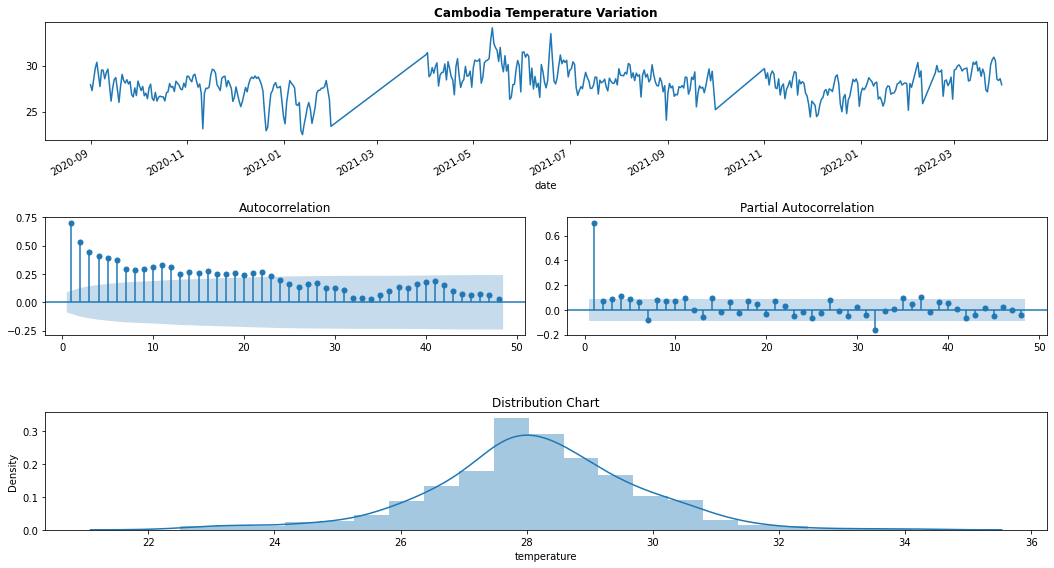

In [102]:
# The first approach is to check the series without any transformation
check_stationarity(tem['temperature'])

## Data Transformation to achieve Stationarity <a name="data-transform"></a>

There are a couple of ways to achieve stationarity through data transformation like taking $log_{10}$,$log_{e}$, square, square root, cube, cube root, exponential decay, time shift and so on ...

 lets start of with log transformations. Our objective is to remove the trend component. Hence,  flatter curves( ie: paralle to x-axis) for time series and rolling mean after taking log would say that our data transformation did a good job.

### Log Scale Transformation  <a name="log"></a>

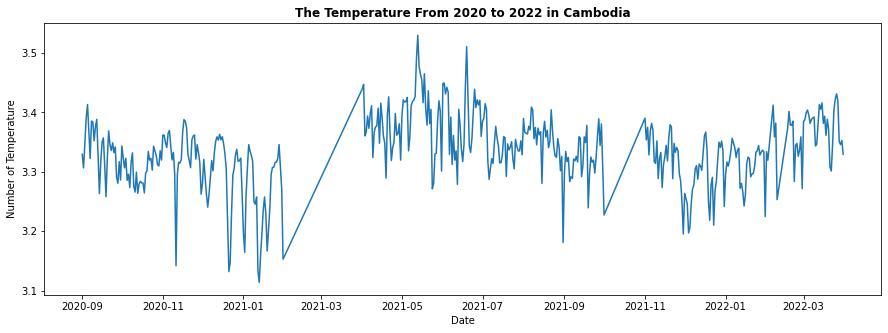

In [103]:
#Estimating trend
tem_logscale = np.log(tem)

## plot line graph
plt.figure(figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Number of Temperature')
plt.title('The Temperature From 2020 to 2022 in Cambodia', fontweight='bold')
plt.plot(tem_logscale)
plt.show()

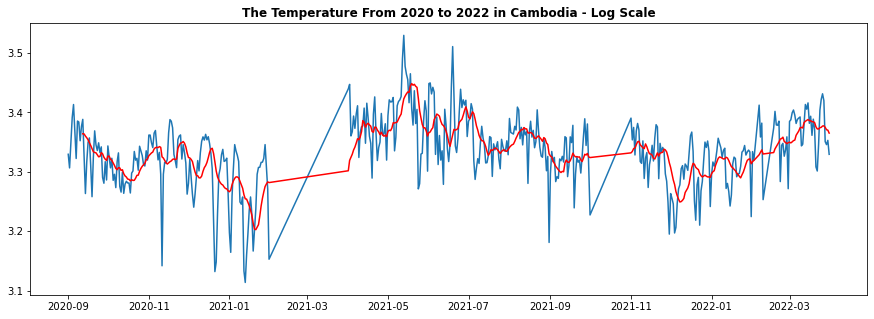

In [104]:
#The below transformation is required to make series stationary

plt.figure(figsize=(15,5))
movingAverage = tem_logscale.rolling(window=12).mean()
movingSTD = tem_logscale.rolling(window=12).std()
plt.title('The Temperature From 2020 to 2022 in Cambodia - Log Scale', fontweight='bold')
plt.plot(tem_logscale)
plt.plot(movingAverage, color='red')
plt.show()

In [105]:
datasetLogScaleMinusMovingAverage = tem_logscale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,temperature
date,
2020-09-12,0.024289
2020-09-13,-0.037413
2020-09-14,-0.096749
2020-09-15,-0.041169
2020-09-16,-0.004464
2020-09-17,0.007847
2020-09-18,-0.033786
2020-09-19,-0.080855
2020-09-20,-0.009914


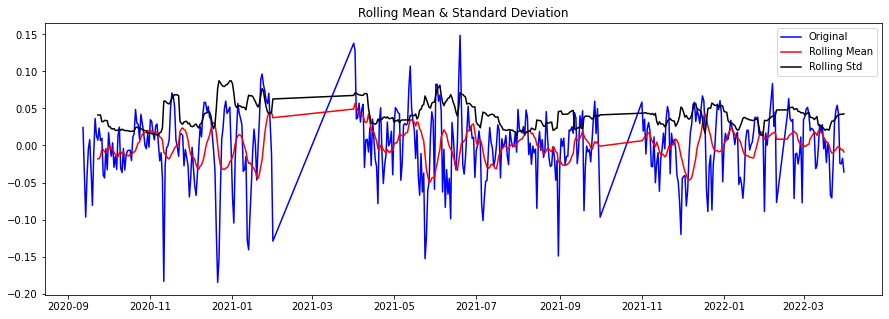

Results of Dickey-Fuller Test:
[ 2.42885180e-02 -3.74127472e-02 -9.67486216e-02 -4.11689693e-02
 -4.46369690e-03  7.84719803e-03 -3.37857020e-02 -8.08545142e-02
 -9.91427256e-03  3.63756848e-02  1.34513600e-02  7.19961083e-03
  2.34800752e-02  6.56886672e-03  9.61106113e-03 -3.97296260e-02
 -4.37595697e-02 -4.13586914e-03 -3.29112032e-02  1.72687547e-02
 -2.28535943e-03 -1.44270714e-02  3.57094016e-03 -2.93932739e-02
 -1.47996376e-02 -3.23057346e-02  1.32384501e-02  2.48216585e-02
 -3.10099244e-02 -3.65397435e-02 -4.01910599e-03 -3.30580825e-02
 -1.38617975e-02 -7.14844285e-03 -6.54036106e-03 -6.22584537e-03
 -2.03844616e-02  1.10607026e-02  1.59806055e-02  4.85965919e-02
  3.03028081e-02  2.86371693e-02  8.36344887e-03  4.20733634e-02
  2.98498122e-02  1.81001748e-02  2.49627967e-04 -4.38306772e-03
  1.52214407e-02 -2.26051780e-03  3.48413605e-02  3.25416130e-02
  1.72329449e-02  7.58886775e-03  2.66435663e-02  2.89343214e-02
  1.86446893e-03 -2.06581782e-02 -9.76515417e-03 -4.5128533

In [106]:
#let's implement it 
test_stationarity(datasetLogScaleMinusMovingAverage)

Results of Dickey-Fuller Test:
Test Statistic                  -3.3069
p-value                          0.0146
Lags Used                       10.0000
Number of Observations Used    467.0000
Critical Value (1%)             -3.4444
Critical Value (5%)             -2.8677
Critical Value (10%)            -2.5701
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The serie seems to be stationary


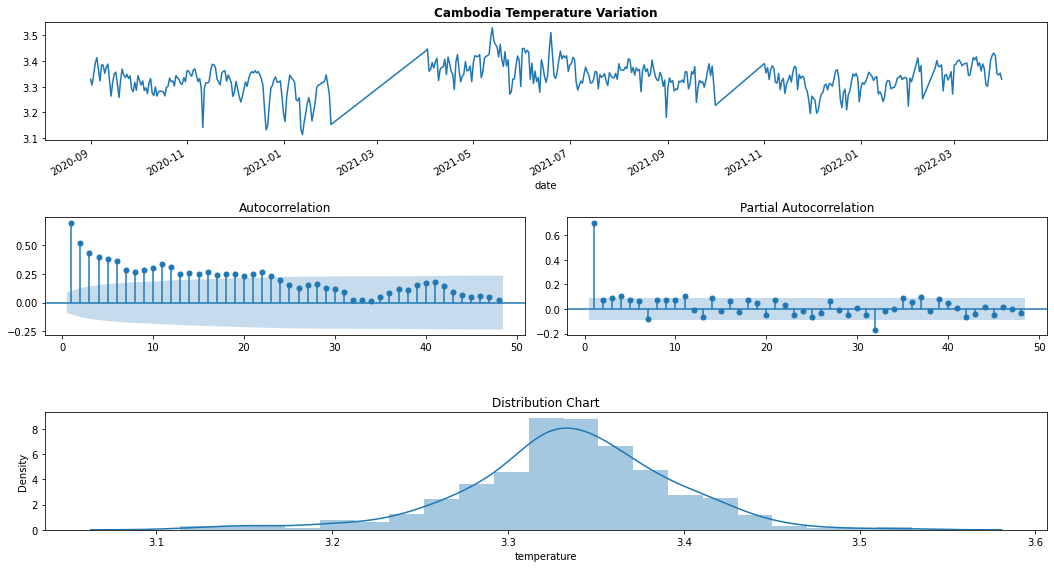

In [107]:
# The first approach is to check the series without any transformation
check_stationarity(tem_logscale['temperature'])